# Computing Mutual Information of Boolean Functions

Text(0.5, 1.0, 'n=4, $\\alpha$=0.2')

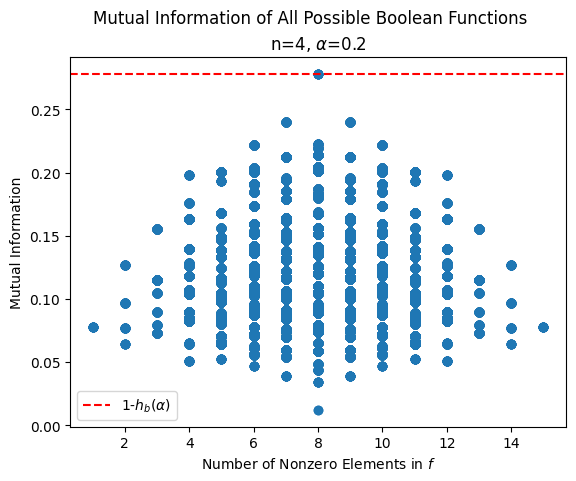

In [3]:
import numpy as np
from matplotlib import pyplot as plt
import boolean_mutual_information as lib


def mutual_information(f: np.ndarray, alpha: float) -> float:
    """The mutual information I(f(X), Y) of a boolean function f, where X is a
    Bernoulli-1/2 binary string and Y is the result of X passed through a
    binary-symmetric channel with crossover probability alpha.

    Args:
        f: The boolean function as an array of 1s or 0s representing the
            "output" column of a truth table.
        alpha: Crossover probability of the binary-symmetic channel.
    """
    n = int(np.log2(len(f)))  # Number of bits in X or Y
    k = len(f)  # Number of possible values of X or Y

    i, j = np.meshgrid(np.arange(k), np.arange(k))
    mismatches = np.bitwise_count(np.bitwise_xor(i, j))
    # ^^^ Number of mismatches between y_i and x_j
    A = alpha**mismatches * (1 - alpha) ** (n - mismatches)  # p(X=x_i|Y=y_j)
    A *= 1 / (k)  # p(x)

    p1 = np.sum(f) / len(f)  # p(f(x)=1), which is constant.
    p1y = A @ f  # element j is p(f(X)=1, Y=y_j).
    py = 1 / len(f)  # p(y=y_j), which is constant.
    Hfxy = -np.sum(p1y * np.log2(p1y) + (py - p1y) * np.log2(py - p1y))
    # ^^^ H(f(X), Y)
    mutual_info = lib.binary_entropy(p1) + n - Hfxy
    return mutual_info


n = 4
info = np.zeros(2 ** (2**n) - 2)  # Exclude "always return 0" and "always return 1"
num_nonzero = np.zeros(info.shape)
alpha = 0.2
for i in range(1, 2 ** (2**n) - 1):
    f = np.fromiter(np.binary_repr(i), dtype="int")
    f = np.pad(f, (2**n - len(f), 0))
    info[i - 1] = mutual_information(f, alpha)
    num_nonzero[i - 1] = np.sum(f)

plt.scatter(num_nonzero, info)
plt.axhline(
    1 - lib.binary_entropy(alpha), linestyle="--", color="red", label="1-$h_b(\\alpha)$"
)
plt.legend()
plt.xlabel("Number of Nonzero Elements in $f$")
plt.ylabel("Mutual Information")
plt.suptitle("Mutual Information of All Possible Boolean Functions")
plt.title(f"n={n}, $\\alpha$={alpha}")